In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
stock_train = "../will_data/train_data.csv"
df_train = pd.read_csv(stock_train, parse_dates=['Date'], index_col='Date')
print(df_train.shape)
df_train.tail()

(1531, 25)


,AAPL,ABBV,AMZN,AVGO,BAC,BRK-B,COST,CVX,DIS,GOOG,...,MA,META,MSFT,NVDA,PFE,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-25,38.129673,67.839424,83.528503,234.116104,27.163700,202.750000,197.574448,95.166061,109.748734,54.549500,...,199.255554,149.009995,102.960045,39.754299,33.577633,85.839859,19.802668,253.273529,135.386993,57.892776
2019-01-28,37.776806,64.975578,81.894501,233.836487,27.209612,200.949997,199.180954,94.283485,109.472122,53.504002,...,196.526093,147.470001,100.952141,34.258450,32.660526,85.766495,19.758667,252.064087,132.770416,57.505310
2019-01-29,37.385258,65.253548,79.694000,232.700607,26.989216,202.050003,198.746246,93.997711,109.561035,53.030998,...,195.622757,144.190002,98.896210,32.667286,33.685032,85.784843,19.830667,252.602646,131.803864,57.723255
2019-01-30,39.939968,66.592819,83.521500,236.632553,26.695356,205.960007,199.729065,94.989532,108.800323,54.452999,...,200.315979,150.419998,102.201073,34.104553,34.354279,86.683586,20.584667,255.465698,134.342300,58.352879
2019-01-31,40.227585,67.628860,85.936501,234.386993,26.144367,205.539993,202.828705,96.368019,110.173538,55.818501,...,207.296890,166.690002,100.327675,35.683304,35.379406,88.471909,20.468000,255.305038,131.813629,59.152000


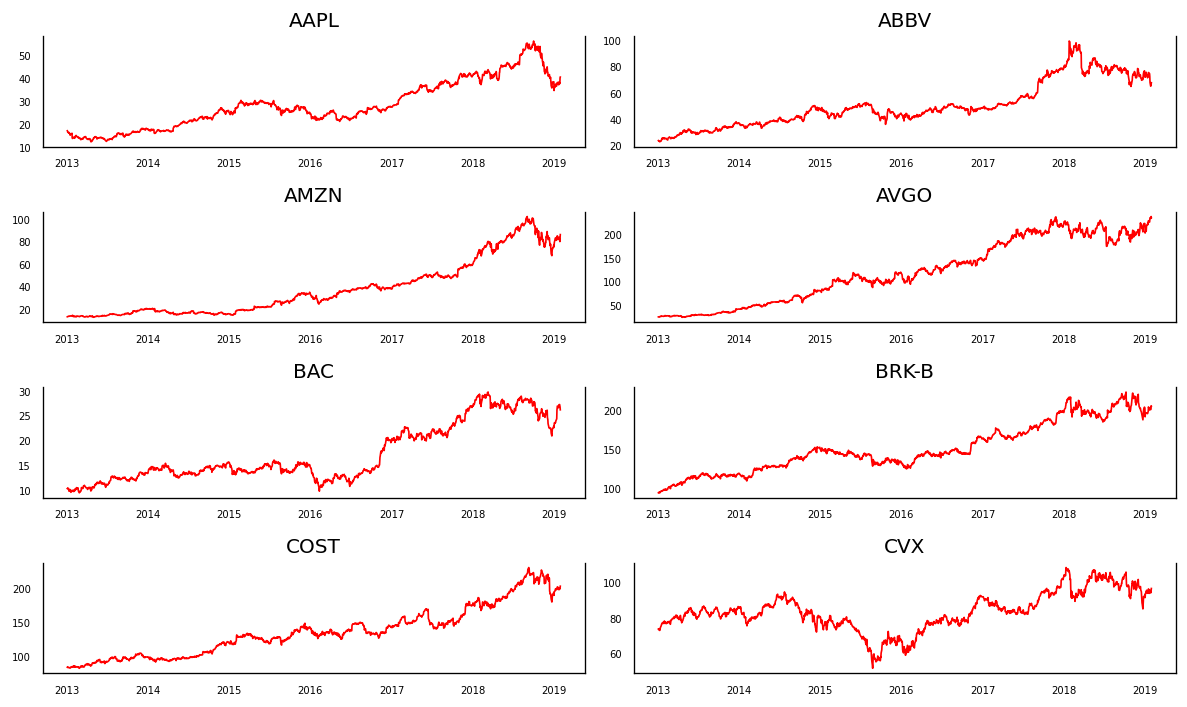

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [6]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,AAPL_x,ABBV_x,AMZN_x,AVGO_x,BAC_x,BRK-B_x,COST_x,CVX_x,DIS_x,GOOG_x,...,MA_x,META_x,MSFT_x,NVDA_x,PFE_x,PG_x,TSLA_x,UNH_x,V_x,XOM_x
AAPL_y,1.0000,0.0003,0.0015,0.0046,0.0000,0.0000,0.8243,0.0189,0.0247,0.0000,...,0.0045,0.0000,0.0001,0.0023,0.0021,0.0002,0.0016,0.0093,0.0001,0.0097
ABBV_y,0.0047,1.0000,0.0011,0.0010,0.0121,0.0006,0.0238,0.0015,0.5558,0.0008,...,0.0001,0.0003,0.0074,0.0000,0.2395,0.0003,0.0283,0.0237,0.0001,0.1924
AMZN_y,0.0584,0.0000,1.0000,0.0000,0.0000,0.0036,0.0006,0.0131,0.0021,0.0005,...,0.0029,0.0000,0.0001,0.0000,0.0067,0.0002,0.0478,0.0041,0.0006,0.0724
AVGO_y,0.0003,0.0304,0.0008,1.0000,0.0182,0.0004,0.0033,0.0015,0.0191,0.0346,...,0.0015,0.0870,0.0137,0.0117,0.0002,0.1178,0.0042,0.0008,0.0001,0.0131
BAC_y,0.3219,0.0000,0.2091,0.0027,1.0000,0.4404,0.2633,0.0440,0.1680,0.1282,...,0.5281,0.0102,0.3518,0.0173,0.0071,0.0025,0.4256,0.0313,0.4690,0.3511
BRK-B_y,0.0244,0.0000,0.0061,0.0356,0.0423,1.0000,0.0450,0.0489,0.2447,0.0003,...,0.0135,0.0000,0.0001,0.0000,0.0086,0.0000,0.2345,0.0058,0.0251,0.5043
COST_y,0.0000,0.0114,0.0000,0.0000,0.0043,0.0039,1.0000,0.0519,0.3014,0.0013,...,0.0000,0.0139,0.0005,0.0000,0.0540,0.0022,0.3952,0.0006,0.0000,0.1291
CVX_y,0.0603,0.0041,0.0193,0.1151,0.4334,0.0345,0.1795,1.0000,0.1673,0.1621,...,0.0131,0.0327,0.0363,0.0010,0.0039,0.0582,0.2010,0.0456,0.0018,0.0399
DIS_y,0.0646,0.1651,0.0356,0.2239,0.3545,0.3640,0.0043,0.3830,1.0000,0.2418,...,0.0401,0.2740,0.0036,0.3357,0.2832,0.0588,0.3191,0.1372,0.0127,0.5739
GOOG_y,0.0126,0.0008,0.0009,0.0052,0.0005,0.0007,0.1617,0.0240,0.1397,1.0000,...,0.0072,0.0001,0.0000,0.0004,0.0636,0.0020,0.0398,0.0006,0.0000,0.1306


In [7]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
AAPL   ::  1320.79   > nan       =>   False
ABBV   ::  1182.99   > nan       =>   False
AMZN   ::  1059.17   > nan       =>   False
AVGO   ::  938.5     > nan       =>   False
BAC    ::  820.35    > nan       =>   False
BRK-B  ::  720.98    > nan       =>   False
COST   ::  628.41    > nan       =>   False
CVX    ::  545.62    > nan       =>   False
DIS    ::  473.85    > nan       =>   False
GOOG   ::  412.3     > nan       =>   False
GOOGL  ::  354.11    > nan       =>   False
HD     ::  307.58    > nan       =>   False
JNJ    ::  262.28    > nan       =>   False
JPM    ::  219.17    > 311.1288  =>   False
KO     ::  183.15    > 263.2603  =>   False
MA     ::  152.05    > 219.4051  =>   False
META   ::  124.64    > 179.5199  =>   False
MSFT   ::  100.07    > 143.6691  =>   False
NVDA   ::  77.93     > 111.7797  =>   False
PFE    ::  59.26     > 83.9383   =>   False
PG     ::  42.44     > 60.0627 

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/vector_ar/vecm.py:648: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn(


In [8]:
stock_test = "../will_data/test_data.csv"
df_test = pd.read_csv(stock_test, parse_dates=['Date'], index_col='Date')
print(df_test.shape)
df_test.tail()

(271, 25)


,AAPL,ABBV,AMZN,AVGO,BAC,BRK-B,COST,CVX,DIS,GOOG,...,MA,META,MSFT,NVDA,PFE,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,73.324806,82.987923,100.464500,264.571075,30.740173,221.690002,299.917877,92.659424,133.009995,71.079498,...,320.423187,200.720001,167.059509,68.101685,30.012110,116.030663,55.585999,266.915466,195.611847,48.357437
2020-02-25,70.841141,79.459549,98.637001,256.477875,29.190491,218.050003,291.550140,89.119759,128.190002,69.422501,...,298.928131,196.770004,164.302734,65.303154,29.371529,114.270905,53.327332,253.079224,185.388016,46.504143
2020-02-26,71.964943,78.773483,98.979500,259.381287,28.767847,216.059998,292.334320,86.757050,123.360001,69.658997,...,294.141510,197.199997,166.355667,66.698685,30.055389,113.075798,51.919998,252.704468,184.217010,45.483101
2020-02-27,67.260727,76.109390,94.214996,248.557144,27.359039,207.669998,280.323059,83.297012,118.040001,65.904503,...,282.081329,189.750000,154.634399,62.985851,29.518692,106.808434,45.266666,243.979904,177.132126,42.746056
2020-02-28,67.221382,76.367775,94.187500,247.350342,26.767338,206.339996,268.856934,82.597939,117.650002,66.966499,...,286.453430,192.470001,158.378571,67.342003,28.930048,106.554359,44.532665,244.979187,178.854156,44.136024


In [4]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [5]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

/var/folders/q4/2btmtsdx1sjdxdqt3m3mjsc00000gn/T/ipykernel_6853/3962751950.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


    Augmented Dickey-Fuller Test on "AAPL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9415
 No. Lags Chosen       = 8
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.774. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ABBV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4297
 No. Lags Chosen       = 16
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.5679. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "AMZN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit ro

In [3]:
df_differenced = df_train.diff().dropna()

In [7]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

/var/folders/q4/2btmtsdx1sjdxdqt3m3mjsc00000gn/T/ipykernel_6853/1244805990.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():


    Augmented Dickey-Fuller Test on "AAPL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.2546
 No. Lags Chosen       = 7
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ABBV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8826
 No. Lags Chosen       = 15
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "AMZN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.0

In [4]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -24.420413041812832
BIC :  -22.15354581888681
FPE :  2.4796190632434862e-11
HQIC:  -23.576732015412095 

Lag Order = 2
AIC :  -24.283663697593926
BIC :  -19.83475231905908
FPE :  2.8445146369793302e-11
HQIC:  -22.62781676782156 

Lag Order = 3
AIC :  -24.133667265515946
BIC :  -17.50038987198916
FPE :  3.309597664142563e-11
HQIC:  -21.66473694370663 

Lag Order = 4
AIC :  -23.9782827181063
BIC :  -15.158313412793643
FPE :  3.8767543436980333e-11
HQIC:  -20.695349875328922 

Lag Order = 5
AIC :  -23.897519469727627
BIC :  -12.888528308756632
FPE :  4.222197569580023e-11
HQIC:  -19.79966333279073 

Lag Order = 6
AIC :  -23.78147106107052
BIC :  -10.581124043793036
FPE :  4.77442086936249e-11
HQIC:  -18.867769208515426 

Lag Order = 7
AIC :  -23.68977429928696
BIC :  -8.295733358552411
FPE :  5.283510560739439e-11
HQIC:  -17.959302657368546 

Lag Order = 8
AIC :  -23.61921256691229
BIC :  -6.029135559311303
FPE :  5.743208412702455e-11
HQIC:  -17.07104540556739 

Lag 

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-24.35*,-24.26*,2.671e-11*,-24.31*
1,-24.29,-22.01,2.828e-11,-23.44
2,-24.16,-19.69,3.218e-11,-22.50
3,-24.02,-17.36,3.705e-11,-21.54
4,-23.88,-15.02,4.290e-11,-20.58
5,-23.80,-12.75,4.658e-11,-19.69
6,-23.70,-10.45,5.203e-11,-18.77
7,-23.62,-8.184,5.670e-11,-17.87
8,-23.56,-5.934,6.085e-11,-17.00
9,-23.45,-3.630,6.914e-11,-16.07


In [9]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Sep, 2022
Time:                     18:56:35
--------------------------------------------------------------------
No. of Equations:         25.0000    BIC:                   -19.8348
Nobs:                     1528.00    HQIC:                  -22.6278
Log likelihood:          -34375.7    FPE:                2.84451e-11
AIC:                     -24.2837    Det(Omega_mle):     1.25181e-11
--------------------------------------------------------------------
Results for equation AAPL
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.020367         0.012242            1.664           0.096
L1.AAPL          0.076084         0.035780            2.126           0.033
L1.ABBV          0.013912         0.015157            0.918           0.359
L1.AM

In [10]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

2


array([[ 2.55471039,  1.33927155,  3.82749939,  3.9319458 , -0.29385948,
         3.91000366,  0.9828186 ,  0.99182129, -0.76071167,  1.42200089,
         1.39650345,  2.27641296,  1.18650055,  0.21601868,  0.40880966,
         4.69322205,  6.22999573,  3.30486298,  1.4372673 ,  0.66924667,
         0.89874268,  0.75399971,  2.86305237,  2.53843689,  0.62962341],
       [ 0.28761673,  1.03604126,  2.41500092, -2.24555969, -0.55098915,
        -0.42001343,  3.09963989,  1.37848663,  1.37321472,  1.3655014 ,
         1.39499664,  1.23423767,  1.30425262, -0.81906128,  0.23995209,
         6.98091125, 16.27000427, -1.87339783,  1.57875061,  1.02512741,
         1.78832245, -0.11666679, -0.16065979, -2.52867126,  0.79912186]])

In [11]:
fc = model_fitted.forecast(y=forecast_input, steps=len(df_test.index))
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df_test.columns + '_2d')
df_forecast

,AAPL_2d,ABBV_2d,AMZN_2d,AVGO_2d,BAC_2d,BRK-B_2d,COST_2d,CVX_2d,DIS_2d,GOOG_2d,...,MA_2d,META_2d,MSFT_2d,NVDA_2d,PFE_2d,PG_2d,TSLA_2d,UNH_2d,V_2d,XOM_2d
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,0.317677,1.046822,0.990445,0.328939,-0.091272,-1.032756,0.419565,-0.388225,0.784254,0.970694,...,2.890249,2.065392,1.458014,1.291827,0.109723,-0.105115,0.624966,0.977171,2.266805,-0.066076
2019-02-04,0.536692,-0.238258,1.380420,-0.305784,-0.063934,-0.875847,-0.390824,-0.092331,-0.258702,0.607467,...,2.287777,1.077983,0.856946,0.521832,-0.096413,0.092932,0.225447,1.464844,1.759895,-0.433082
2019-02-05,-0.032909,0.196777,-0.050152,-0.203555,-0.018069,-0.242212,-0.194710,-0.075814,0.118649,-0.182719,...,-0.403622,-0.488364,-0.175536,-0.095327,-0.020046,-0.002076,0.095856,0.222517,-0.398723,-0.043083
2019-02-06,-0.086428,0.170630,-0.164104,-0.270979,0.017614,0.169637,0.004575,-0.092800,0.102742,-0.112745,...,-0.044989,-0.331634,-0.042854,0.039535,0.022123,0.007912,0.019918,0.025757,-0.092391,-0.047935
2019-02-07,0.019789,-0.004715,0.053939,0.178363,0.009156,0.160710,0.136880,0.063147,0.050533,0.033553,...,0.071866,0.214731,0.035534,0.069870,0.014706,0.012998,-0.005873,-0.001987,0.061409,0.008022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,0.016169,0.029791,0.048912,0.136124,0.010204,0.071698,0.077417,0.014477,0.041367,0.025233,...,0.106713,0.091499,0.052193,0.022537,0.011734,0.023798,0.012424,0.138885,0.064259,-0.000057
2020-02-25,0.016169,0.029791,0.048912,0.136124,0.010204,0.071698,0.077417,0.014477,0.041367,0.025233,...,0.106713,0.091499,0.052193,0.022537,0.011734,0.023798,0.012424,0.138885,0.064259,-0.000057
2020-02-26,0.016169,0.029791,0.048912,0.136124,0.010204,0.071698,0.077417,0.014477,0.041367,0.025233,...,0.106713,0.091499,0.052193,0.022537,0.011734,0.023798,0.012424,0.138885,0.064259,-0.000057


In [12]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [17]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.to_csv("results.csv")

/var/folders/q4/2btmtsdx1sjdxdqt3m3mjsc00000gn/T/ipykernel_7080/1605795508.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout();


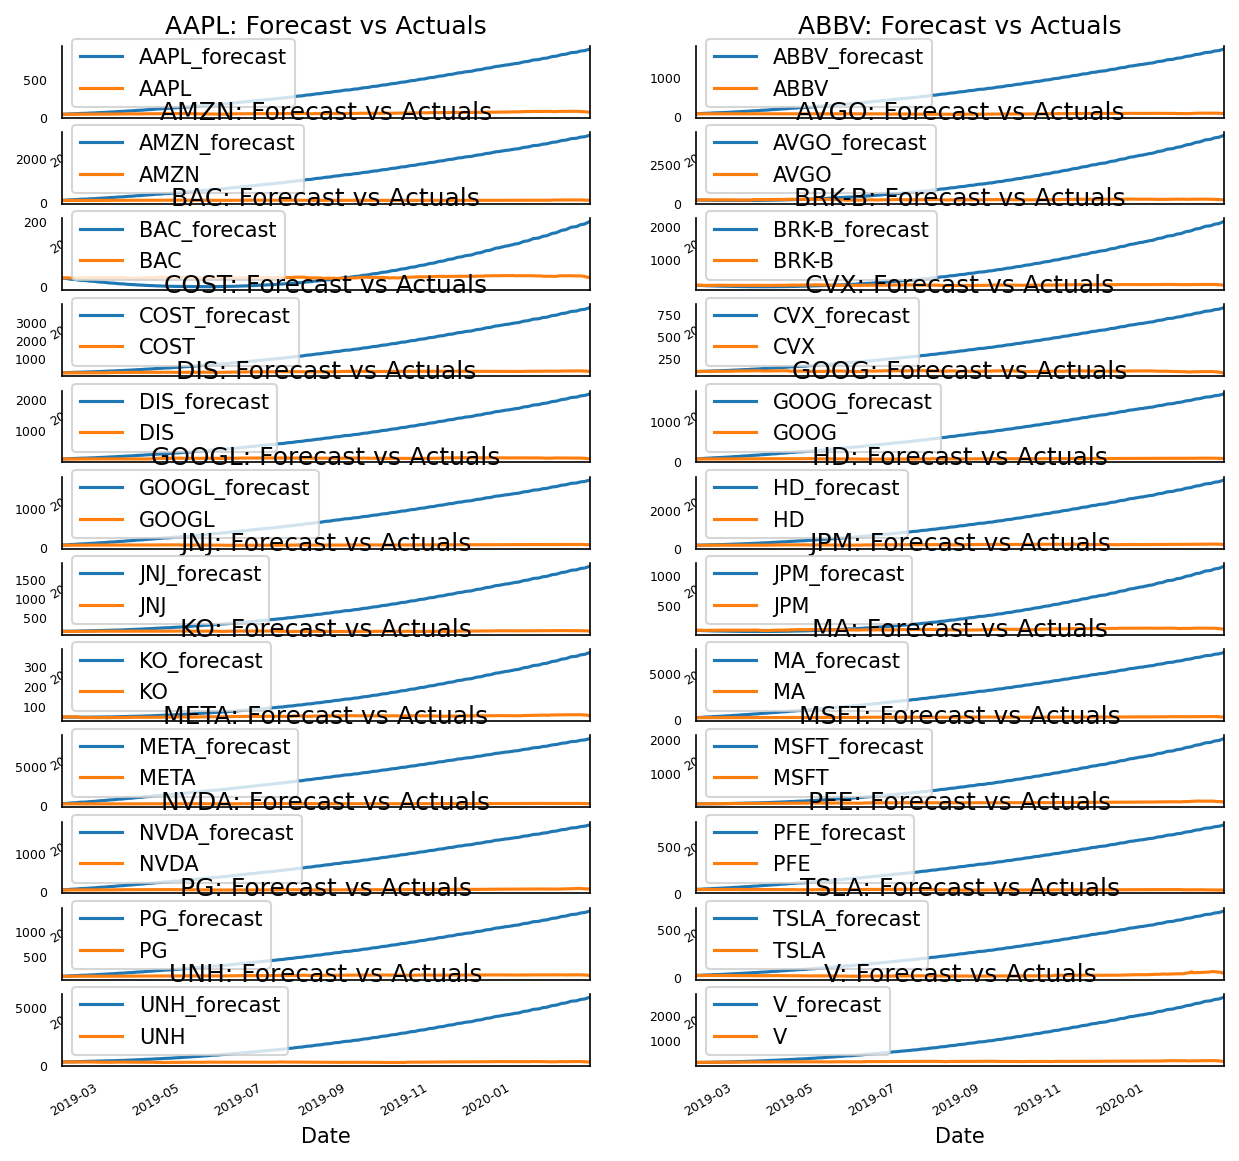

In [16]:
fig, axes = plt.subplots(nrows=int(len(df_train.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_train.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();